In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Installation requirements
!pip install scikit-learn pandas numpy matplotlib
!pip install seaborn

import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split

# To fetch datasets from UCI repository
!pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Mushroom Dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
print(X.head())
print(y.head())


  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

In [4]:
import pandas as pd

df = pd.concat([X, y], axis=1)

df.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


# Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [6]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


# Check Missing Values 

In [7]:
missing_summary = df.isna().sum()
print("Missing values per column:\n", missing_summary)
print("\n Columns with missing values:")
print(missing_summary[missing_summary > 0])

print("\nTotal missing values in dataset:", missing_summary.sum())


Missing values per column:
 cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

 Columns with missing values:
stalk-root    2480
dtype: int64

Total missing values in dataset: 2480


#  Drop rows with missing values

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

In [10]:
df.shape

(5644, 23)


# Separate Features and Target

In [11]:
X = df.drop('poisonous', axis=1)
y = df['poisonous']

In [12]:
X.shape

(5644, 22)

In [13]:
y.shape

(5644,)

# Encode Categorical Data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in X.columns:
    X[col] = encoder.fit_transform(X[col])

y = encoder.fit_transform(y)


# Train-Test Split (80-20)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:

print("\n Training set shape:", X_train.shape)
print("\n Testing set shape:", X_test.shape)
print("\n Any missing values left?", X.isna().sum().sum())
print("\nSample of preprocessed data:")
X_train.head()



 Training set shape: (4515, 22)

 Testing set shape: (1129, 22)

 Any missing values left? 0

Sample of preprocessed data:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5212,5,2,0,1,2,1,0,0,4,1,...,2,5,5,0,0,1,3,0,3,1
1076,2,0,4,0,5,1,0,1,4,0,...,2,5,5,0,0,1,3,2,5,5
2300,5,3,2,1,5,1,0,0,4,1,...,2,5,4,0,0,1,3,2,4,0
3956,5,3,7,0,2,1,0,0,1,0,...,1,0,4,0,0,1,1,0,5,4
4331,5,3,7,0,2,1,0,0,1,0,...,1,4,4,0,0,1,1,0,4,1


# Data Visualization

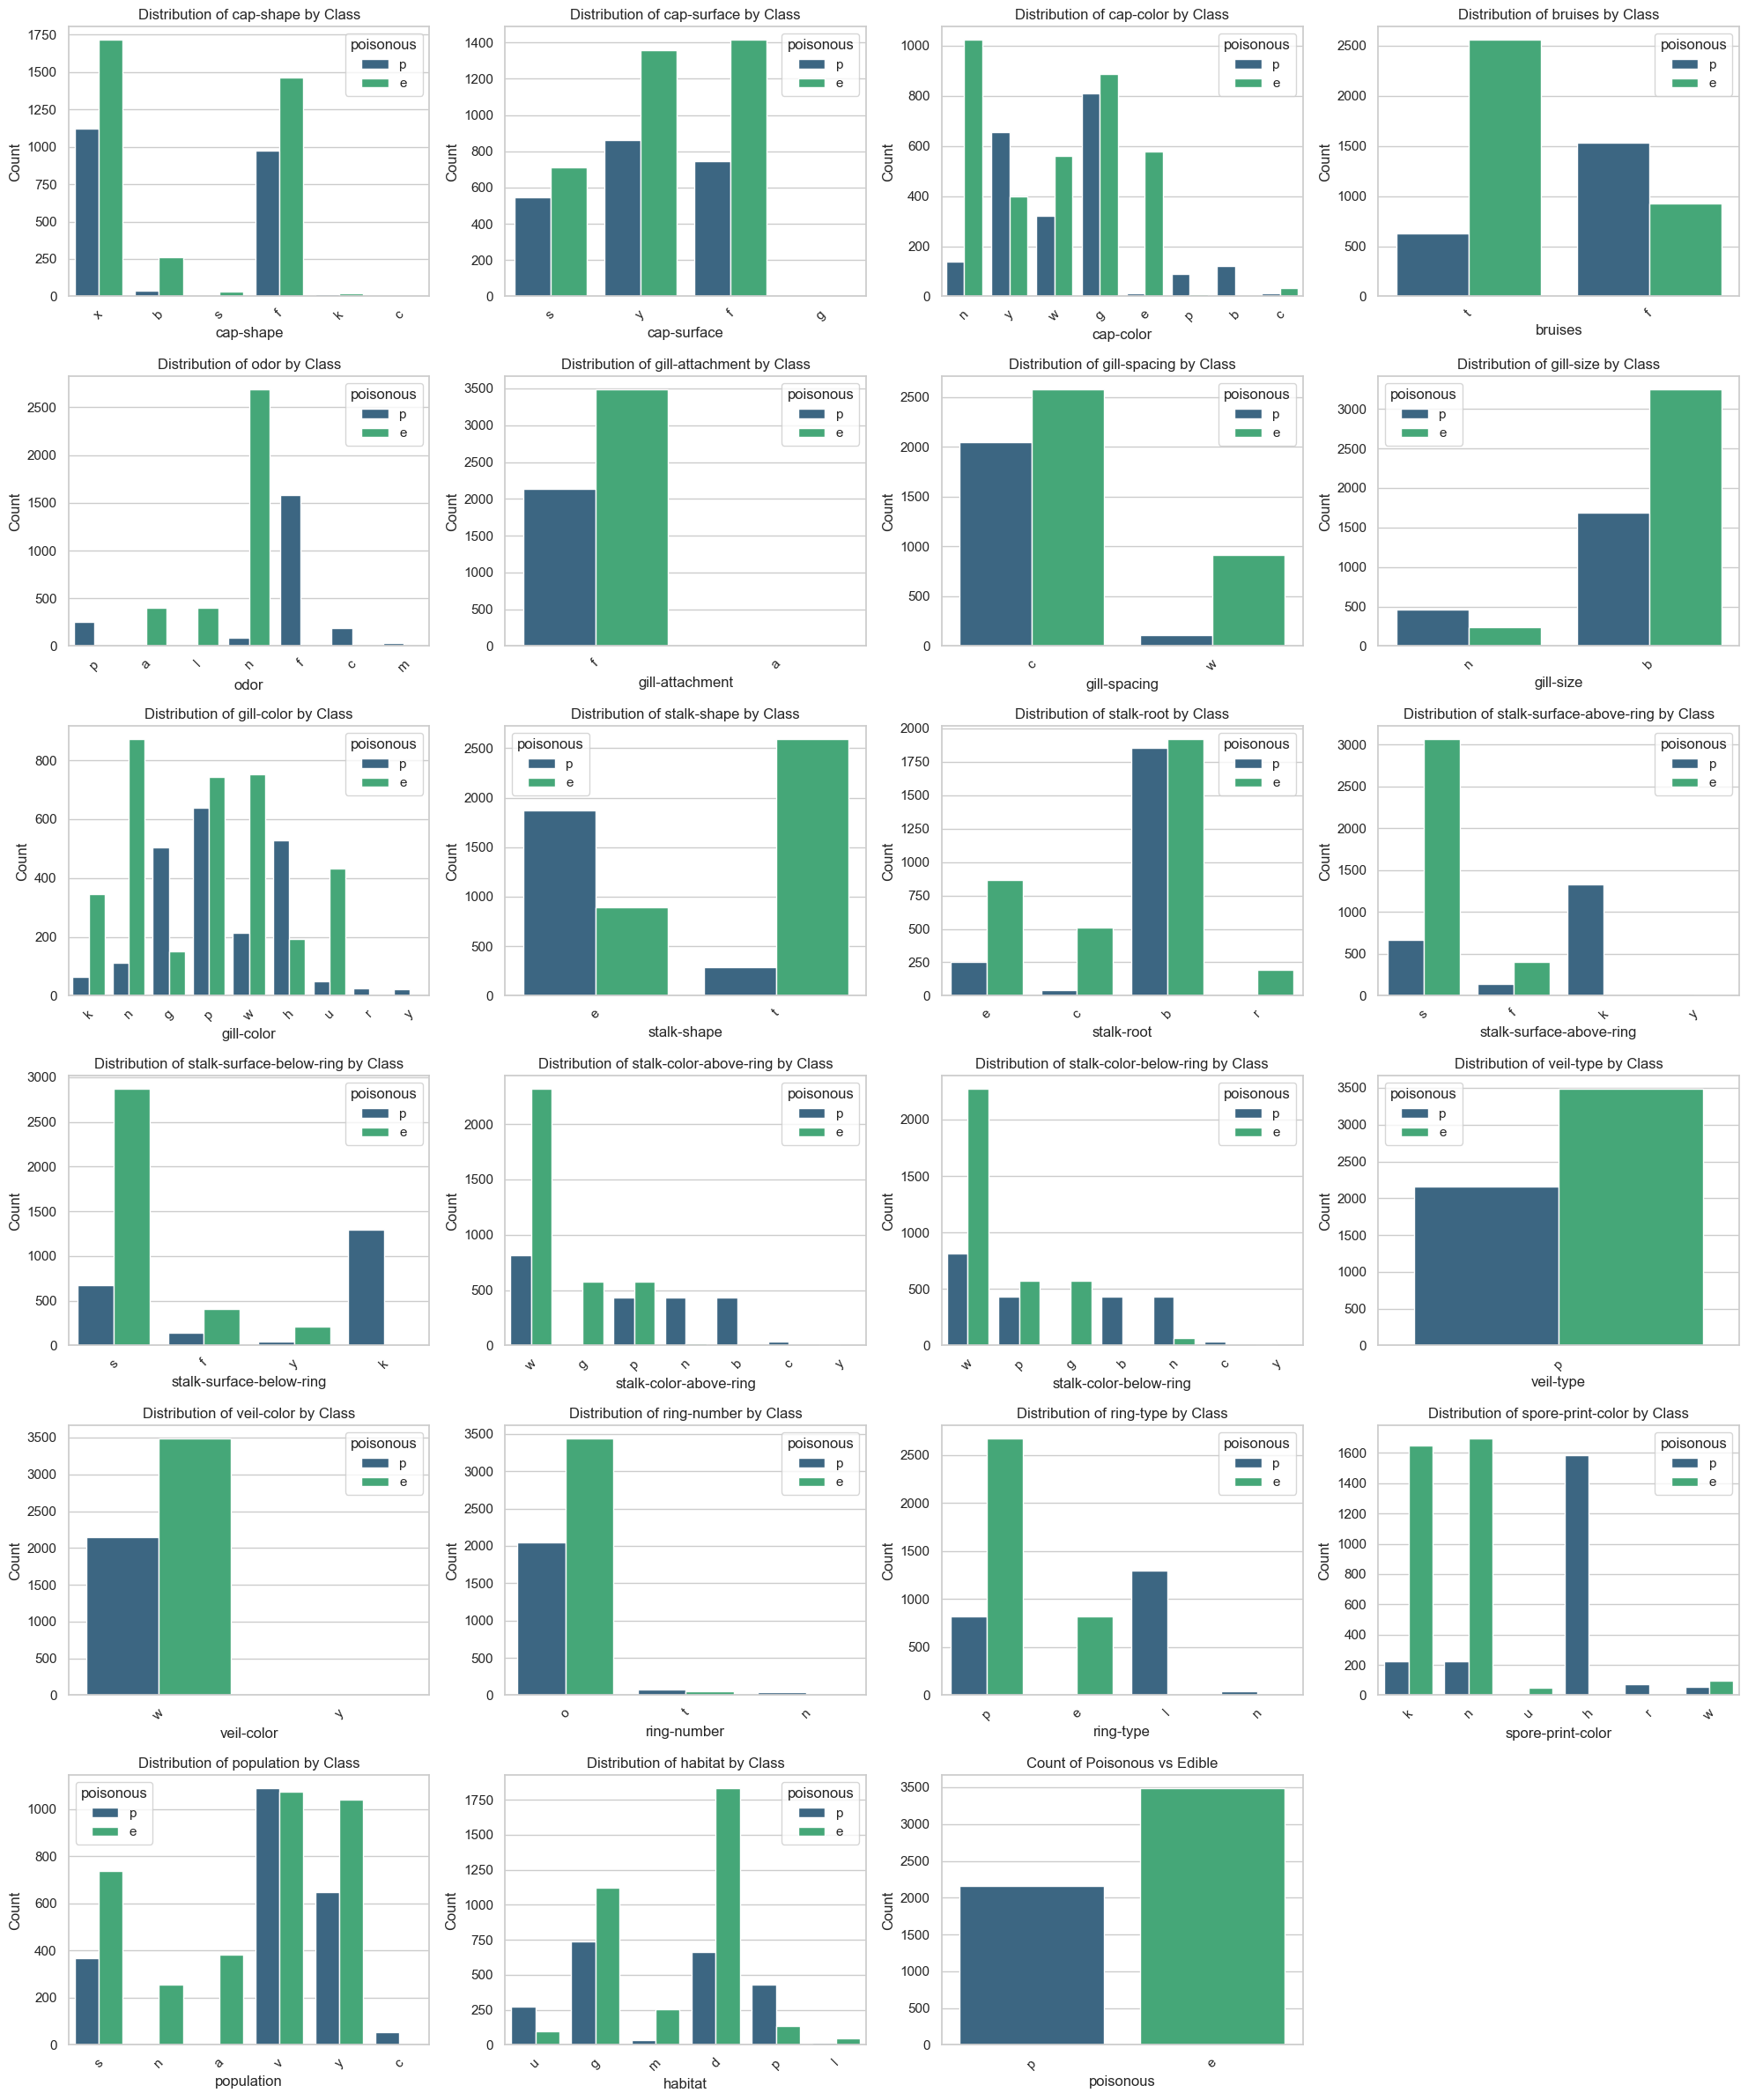

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Separating features and target
target_col = 'poisonous'
features = [col for col in df.columns if col != target_col]
features.append(target_col)  # keeping target at the end

n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols  #

plt.figure(figsize=(20, n_rows * 4))


for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if feature != target_col:
        sns.countplot(data=df, x=feature, hue=target_col, palette='viridis')
        plt.title(f"Distribution of {feature} by Class")
    else:
        sns.countplot(data=df, x=feature, palette='viridis')
        plt.title("Count of Poisonous vs Edible")
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Implement Naive Bayes from Scratch    

In [18]:
import numpy as np
import pandas as pd

class NaiveBayesClassifier:
    def __init__(self, alpha=1.0):
        """
        Initialize with Laplace smoothing parameter alpha.
        """
        self.alpha = alpha
        self.class_priors = {}     
        self.feature_probs = {}    
        self.classes = None
        self.feature_names = None

    def fit(self, X, y):
        """
        Fit the Naive Bayes model to the training data.
        Calculates class priors and conditional probabilities P(x_i | y).
        """
        
        X = pd.DataFrame(X).reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)
        self.feature_names = X.columns
        self.classes = np.unique(y)

        self.class_priors = y.value_counts(normalize=True).to_dict()

        self.feature_probs = {}

        for cls in self.classes:
            X_c = X[y == cls]
            class_feature_probs = {}

            for feature in X.columns:
                feature_counts = X_c[feature].value_counts()
                total_count = feature_counts.sum()

                # Applying Laplace smoothing
                probs = (feature_counts + self.alpha) / (
                    total_count + self.alpha * X[feature].nunique()
                )

                class_feature_probs[feature] = probs.to_dict()

            self.feature_probs[cls] = class_feature_probs

    def predict(self, X):
        """
        Predict class labels for given test data X using the Naive Bayes rule.
        """
        X = pd.DataFrame(X)
        y_pred = []

        for _, x in X.iterrows():
            class_probs = {}

            for cls in self.classes:
                # Start with log(P(y))
                log_prob = np.log(self.class_priors[cls])

                for feature in X.columns:
                    feature_val = x[feature]
                    probs = self.feature_probs[cls][feature]

                    # Using Laplace-smoothed probability if unseen value appears
                    p_x_given_y = probs.get(
                        feature_val,
                        self.alpha / (sum(probs.values()) + self.alpha * len(probs))
                    )

                    log_prob += np.log(p_x_given_y)

                class_probs[cls] = log_prob

            y_pred.append(max(class_probs, key=class_probs.get))

        return np.array(y_pred)


## Experimenting with different Laplace smoothing (alpha) values

Naive Bayes Accuracy for Different α values:

Alpha = 0.0001  → Accuracy = 0.9885
Alpha = 0.001   → Accuracy = 0.9522
Alpha = 0.01    → Accuracy = 0.9194
Alpha = 0.1     → Accuracy = 0.8716
Alpha = 1       → Accuracy = 0.8432
Alpha = 10      → Accuracy = 0.8388


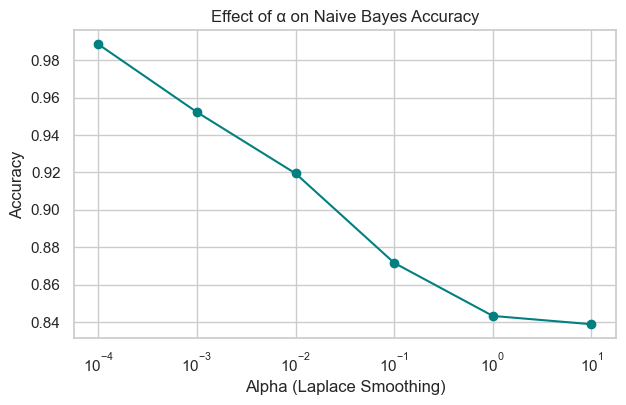

In [19]:

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

print("Naive Bayes Accuracy for Different α values:\n")
results = []

for a in alpha_values:
    nb = NaiveBayesClassifier(alpha=a)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = np.mean(y_pred == y_test)
    results.append((a, acc))
    print(f"Alpha = {a:<7} → Accuracy = {acc:.4f}")

# Visualizing the results
import matplotlib.pyplot as plt

alphas = [r[0] for r in results]
accuracies = [r[1] for r in results]

plt.figure(figsize=(7, 4))
plt.plot(alphas, accuracies, marker='o', linestyle='-', color='teal')
plt.xscale('log')  
plt.xlabel("Alpha (Laplace Smoothing)")
plt.ylabel("Accuracy")
plt.title("Effect of α on Naive Bayes Accuracy")
plt.grid(True)
plt.show()


### Effect of the Smoothing Factor (α) on Naive Bayes

The Laplace smoothing parameter **α** controls how much probability mass is added to unseen feature–class combinations in the Naive Bayes model. It acts as a regularization term that prevents the model from overfitting to the training data.

#### 1. When α is Very Small (e.g., 0.0001)
- The model almost completely trusts the training data.  
- Probabilities for unseen features become **extremely small or zero**, leading to overfitting.  
- The model performs well on training data but fails to generalize to unseen samples.

#### 2. When α is Large (e.g., 1 or 10)
- The model assumes nearly uniform probabilities across all feature values.  
- This excessive smoothing **washes out meaningful distinctions** between classes, leading to **underfitting**.  
- Both training and test accuracy, precision, recall, and F1 drop.

#### 3. Moderate α (e.g., 0.001–0.01)
- Provides the right balance between bias and variance.  
- It prevents zero probabilities without overly flattening the distribution.  
- The model becomes more stable and generalizes better to unseen data.

---

### How Smoothing Prevents Overfitting

Without smoothing, any unseen feature–class combination during training would produce:

$$
P(x_i | y) = 0
$$

This would make the entire class probability \( P(y|x) \) zero, even if the other features strongly support that class — a typical sign of **overfitting** to training examples.

Laplace smoothing corrects this by modifying the probability estimate as:

$$
P(x_i | y) = \frac{\text{count}(x_i, y) + \alpha}{\text{count}(y) + \alpha \times k}
$$

where \( k \) is the number of possible feature values.  
This ensures that **no probability is ever zero**, allowing the model to handle unseen data gracefully.

By introducing a small positive α, we:
- Reduce the model’s sensitivity to rare or missing feature combinations.
- Encourage **generalization** rather than memorization.
- Control model complexity similarly to adding regularization in other algorithms.

---


The optimal α value is typically the one where **training and test metrics (accuracy, precision, recall, and F1)** are both high and close to each other.  
In this dataset, a small α (around **0.001**) provides the best trade-off — preventing overfitting by avoiding extreme probability estimates while still capturing meaningful feature–class relationships.


# Confusion Matrix for Highest Accuracy 

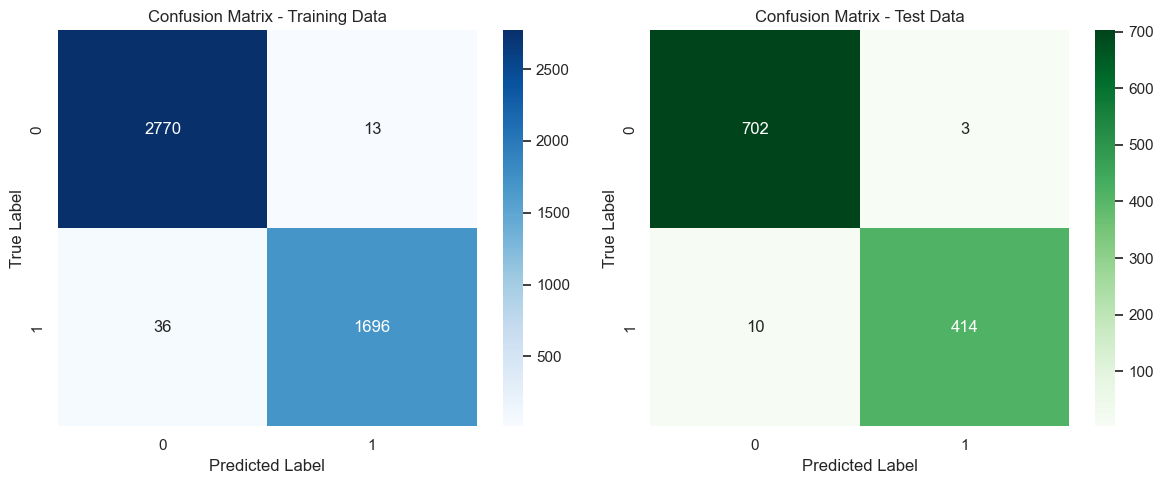

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Best alpha
a_best = 0.0001

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)


nb = NaiveBayesClassifier(alpha=a_best)
nb.fit(X_train_split, y_train_split)

y_pred_train = nb.predict(X_train_split)
y_pred_test = nb.predict(X_test_split)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


cm_train = confusion_matrix(y_train_split, y_pred_train, labels=nb.classes)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Training Data")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")


cm_test = confusion_matrix(y_test_split, y_pred_test, labels=nb.classes)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Data")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


# Selecting one feature that I believe is highly discriminative
# Creating new versions train and test datasets

In [21]:

from sklearn.model_selection import train_test_split

chosen_feature = 'odor'   # Odour hasbeen selected as the most discriminative feature

test_size = 0.2
random_state = 42

if chosen_feature not in X.columns:
    raise ValueError(f"Chosen feature '{chosen_feature}' is not present in X.columns. Please choose another feature.")


num_copies_list = [0, 1, 2, 3, 4]   
# we will store the duplicate copies in this dictionaries
train_sets = {}
test_sets = {}
train_labels = {}
test_labels = {}


for k in num_copies_list:
    X_dup = X.copy()
    for i in range(k):
        X_dup[f"{chosen_feature}_dup{i+1}"] = X_dup[chosen_feature].values

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_dup, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Store them with clear names
    train_sets[f"X_train_{k}dup"] = X_tr
    test_sets[f"X_test_{k}dup"] = X_te
    train_labels[f"y_train_{k}dup"] = y_tr
    test_labels[f"y_test_{k}dup"] = y_te

    print(f"Created dataset version: {k} duplicate(s) of '{chosen_feature}'")
    print(f"Train set: {X_tr.shape}, Test set: {X_te.shape}\n")


Created dataset version: 0 duplicate(s) of 'odor'
Train set: (4515, 22), Test set: (1129, 22)

Created dataset version: 1 duplicate(s) of 'odor'
Train set: (4515, 23), Test set: (1129, 23)

Created dataset version: 2 duplicate(s) of 'odor'
Train set: (4515, 24), Test set: (1129, 24)

Created dataset version: 3 duplicate(s) of 'odor'
Train set: (4515, 25), Test set: (1129, 25)

Created dataset version: 4 duplicate(s) of 'odor'
Train set: (4515, 26), Test set: (1129, 26)



# Iterative Training and Evaluation (Dataset 1: NO COPY) 

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_tr = train_sets["X_train_0dup"]
X_te = test_sets["X_test_0dup"]
y_tr = train_labels["y_train_0dup"]
y_te = test_labels["y_test_0dup"]

best_alpha = 0.0001
nb = NaiveBayesClassifier(alpha=best_alpha)
nb.fit(X_tr, y_tr)


y_tr_pred = nb.predict(X_tr)
y_te_pred = nb.predict(X_te)

train_acc = accuracy_score(y_tr, y_tr_pred)
test_acc  = accuracy_score(y_te, y_te_pred)
train_prec = precision_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_prec  = precision_score(y_te, y_te_pred, average='macro', zero_division=0)
train_rec  = recall_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_rec   = recall_score(y_te, y_te_pred, average='macro', zero_division=0)
train_f1   = f1_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_f1    = f1_score(y_te, y_te_pred, average='macro', zero_division=0)

print("Evaluation Metrics (Dataset with NO Duplicate Copy of Feature)")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing  Accuracy : {test_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Testing  Precision: {test_prec:.4f}")
print(f"Training Recall   : {train_rec:.4f}")
print(f"Testing  Recall   : {test_rec:.4f}")
print(f"Training F1-Score : {train_f1:.4f}")
print(f"Testing  F1-Score : {test_f1:.4f}")


Evaluation Metrics (Dataset with NO Duplicate Copy of Feature)
Training Accuracy : 0.9900
Testing  Accuracy : 0.9885
Training Precision: 0.9906
Testing  Precision: 0.9899
Training Recall   : 0.9883
Testing  Recall   : 0.9858
Training F1-Score : 0.9894
Testing  F1-Score : 0.9878


# Iterative Training and Evaluation (Dataset 2: One Copy) 

In [23]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_tr = train_sets["X_train_1dup"]
X_te = test_sets["X_test_1dup"]
y_tr = train_labels["y_train_1dup"]
y_te = test_labels["y_test_1dup"]

best_alpha = 0.0001
nb = NaiveBayesClassifier(alpha=best_alpha)
nb.fit(X_tr, y_tr)


y_tr_pred = nb.predict(X_tr)
y_te_pred = nb.predict(X_te)

train_acc = accuracy_score(y_tr, y_tr_pred)
test_acc  = accuracy_score(y_te, y_te_pred)
train_prec = precision_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_prec  = precision_score(y_te, y_te_pred, average='macro', zero_division=0)
train_rec  = recall_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_rec   = recall_score(y_te, y_te_pred, average='macro', zero_division=0)
train_f1   = f1_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_f1    = f1_score(y_te, y_te_pred, average='macro', zero_division=0)

print("Evaluation Metrics (Dataset with 1 Duplicate Copy of Feature)")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing  Accuracy : {test_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Testing  Precision: {test_prec:.4f}")
print(f"Training Recall   : {train_rec:.4f}")
print(f"Testing  Recall   : {test_rec:.4f}")
print(f"Training F1-Score : {train_f1:.4f}")
print(f"Testing  F1-Score : {test_f1:.4f}")


Evaluation Metrics (Dataset with 1 Duplicate Copy of Feature)
Training Accuracy : 0.9938
Testing  Accuracy : 0.9920
Training Precision: 0.9943
Testing  Precision: 0.9936
Training Recall   : 0.9925
Testing  Recall   : 0.9896
Training F1-Score : 0.9934
Testing  F1-Score : 0.9915


# Iterative Training and Evaluation (Dataset 3: TWO Copy) 

In [24]:

X_tr = train_sets["X_train_2dup"]
X_te = test_sets["X_test_2dup"]
y_tr = train_labels["y_train_2dup"]
y_te = test_labels["y_test_2dup"]

best_alpha = 0.0001
nb = NaiveBayesClassifier(alpha=best_alpha)
nb.fit(X_tr, y_tr)


y_tr_pred = nb.predict(X_tr)
y_te_pred = nb.predict(X_te)

train_acc = accuracy_score(y_tr, y_tr_pred)
test_acc  = accuracy_score(y_te, y_te_pred)
train_prec = precision_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_prec  = precision_score(y_te, y_te_pred, average='macro', zero_division=0)
train_rec  = recall_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_rec   = recall_score(y_te, y_te_pred, average='macro', zero_division=0)
train_f1   = f1_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_f1    = f1_score(y_te, y_te_pred, average='macro', zero_division=0)

print("Evaluation Metrics (Dataset with 2 Duplicate Copy of Feature)")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing  Accuracy : {test_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Testing  Precision: {test_prec:.4f}")
print(f"Training Recall   : {train_rec:.4f}")
print(f"Testing  Recall   : {test_rec:.4f}")
print(f"Training F1-Score : {train_f1:.4f}")
print(f"Testing  F1-Score : {test_f1:.4f}")


Evaluation Metrics (Dataset with 2 Duplicate Copy of Feature)
Training Accuracy : 0.9909
Testing  Accuracy : 0.9885
Training Precision: 0.9928
Testing  Precision: 0.9909
Training Recall   : 0.9881
Testing  Recall   : 0.9849
Training F1-Score : 0.9903
Testing  F1-Score : 0.9877


# Iterative Training and Evaluation (Dataset 4: THREE Copy) 

In [25]:

X_tr = train_sets["X_train_3dup"]
X_te = test_sets["X_test_3dup"]
y_tr = train_labels["y_train_3dup"]
y_te = test_labels["y_test_3dup"]

best_alpha = 0.0001
nb = NaiveBayesClassifier(alpha=best_alpha)
nb.fit(X_tr, y_tr)


y_tr_pred = nb.predict(X_tr)
y_te_pred = nb.predict(X_te)

train_acc = accuracy_score(y_tr, y_tr_pred)
test_acc  = accuracy_score(y_te, y_te_pred)
train_prec = precision_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_prec  = precision_score(y_te, y_te_pred, average='macro', zero_division=0)
train_rec  = recall_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_rec   = recall_score(y_te, y_te_pred, average='macro', zero_division=0)
train_f1   = f1_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_f1    = f1_score(y_te, y_te_pred, average='macro', zero_division=0)

print("Evaluation Metrics (Dataset with 3 Duplicate Copy of Feature)")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing  Accuracy : {test_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Testing  Precision: {test_prec:.4f}")
print(f"Training Recall   : {train_rec:.4f}")
print(f"Testing  Recall   : {test_rec:.4f}")
print(f"Training F1-Score : {train_f1:.4f}")
print(f"Testing  F1-Score : {test_f1:.4f}")


Evaluation Metrics (Dataset with 3 Duplicate Copy of Feature)
Training Accuracy : 0.9872
Testing  Accuracy : 0.9867
Training Precision: 0.9898
Testing  Precision: 0.9895
Training Recall   : 0.9832
Testing  Recall   : 0.9826
Training F1-Score : 0.9863
Testing  F1-Score : 0.9858


# Iterative Training and Evaluation (Dataset 5: FOUR Copy) 

In [26]:

X_tr = train_sets["X_train_4dup"]
X_te = test_sets["X_test_4dup"]
y_tr = train_labels["y_train_4dup"]
y_te = test_labels["y_test_4dup"]

best_alpha = 0.0001
nb = NaiveBayesClassifier(alpha=best_alpha)
nb.fit(X_tr, y_tr)


y_tr_pred = nb.predict(X_tr)
y_te_pred = nb.predict(X_te)

train_acc = accuracy_score(y_tr, y_tr_pred)
test_acc  = accuracy_score(y_te, y_te_pred)
train_prec = precision_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_prec  = precision_score(y_te, y_te_pred, average='macro', zero_division=0)
train_rec  = recall_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_rec   = recall_score(y_te, y_te_pred, average='macro', zero_division=0)
train_f1   = f1_score(y_tr, y_tr_pred, average='macro', zero_division=0)
test_f1    = f1_score(y_te, y_te_pred, average='macro', zero_division=0)

print("Evaluation Metrics (Dataset with 4 Duplicate Copy of Feature)")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing  Accuracy : {test_acc:.4f}")
print(f"Training Precision: {train_prec:.4f}")
print(f"Testing  Precision: {test_prec:.4f}")
print(f"Training Recall   : {train_rec:.4f}")
print(f"Testing  Recall   : {test_rec:.4f}")
print(f"Training F1-Score : {train_f1:.4f}")
print(f"Testing  F1-Score : {test_f1:.4f}")


Evaluation Metrics (Dataset with 4 Duplicate Copy of Feature)
Training Accuracy : 0.9849
Testing  Accuracy : 0.9849
Training Precision: 0.9881
Testing  Precision: 0.9881
Training Recall   : 0.9803
Testing  Recall   : 0.9803
Training F1-Score : 0.9839
Testing  F1-Score : 0.9839


# Plotting Metrics

Completed training for 0 duplicate(s) — Train Acc: 0.9900, Test Acc: 0.9885
Completed training for 1 duplicate(s) — Train Acc: 0.9938, Test Acc: 0.9920
Completed training for 2 duplicate(s) — Train Acc: 0.9909, Test Acc: 0.9885
Completed training for 3 duplicate(s) — Train Acc: 0.9872, Test Acc: 0.9867
Completed training for 4 duplicate(s) — Train Acc: 0.9849, Test Acc: 0.9849


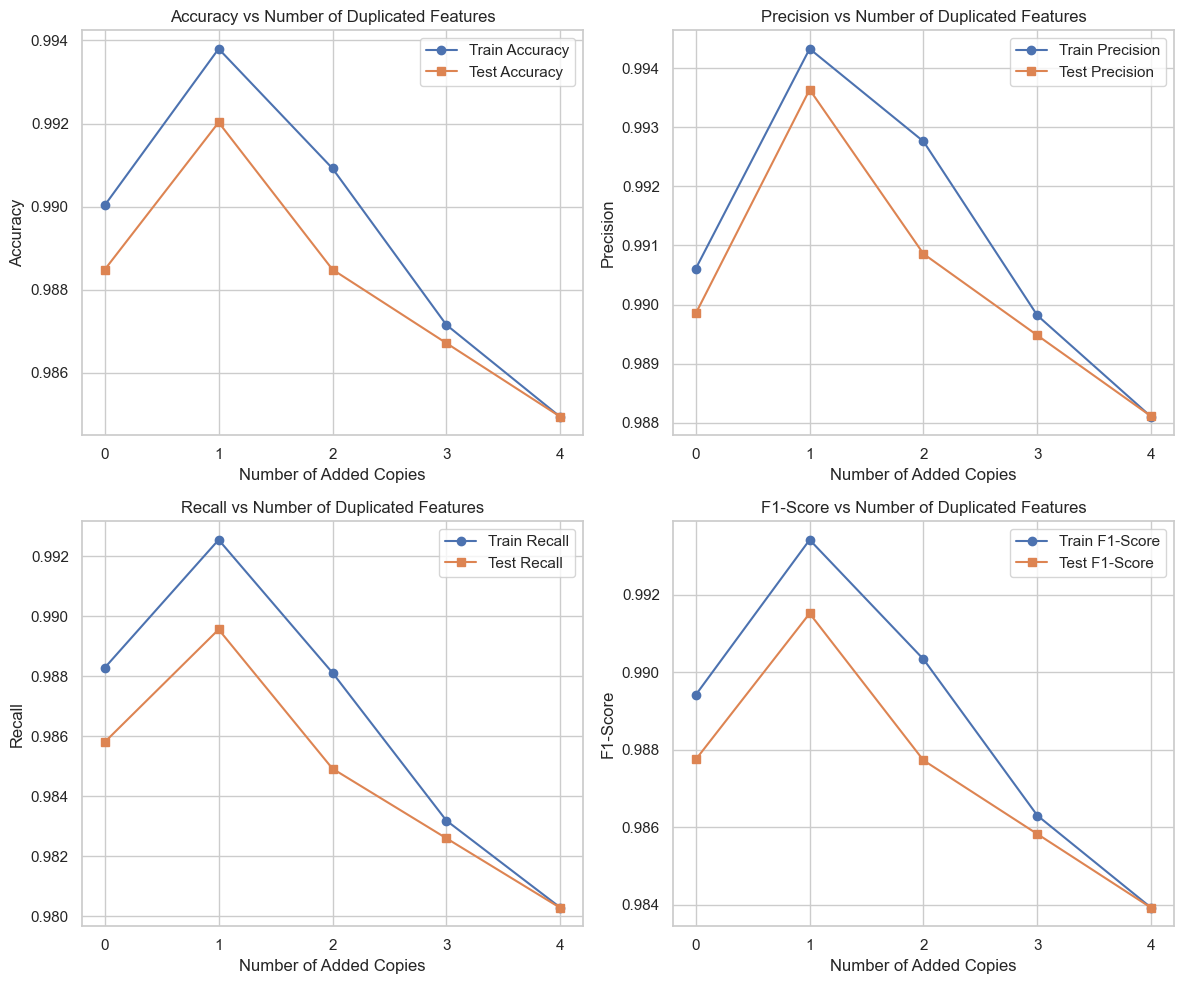

In [27]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

best_alpha = 0.0001
num_copies_list = [0, 1, 2, 3, 4]

train_acc_list, test_acc_list = [], []
train_prec_list, test_prec_list = [], []
train_rec_list, test_rec_list = [], []
train_f1_list, test_f1_list = [], []

for k in num_copies_list:
    X_tr = train_sets[f"X_train_{k}dup"]
    X_te = test_sets[f"X_test_{k}dup"]
    y_tr = train_labels[f"y_train_{k}dup"]
    y_te = test_labels[f"y_test_{k}dup"]
    
    nb = NaiveBayesClassifier(alpha=best_alpha)
    nb.fit(X_tr, y_tr)
    
    y_tr_pred = nb.predict(X_tr)
    y_te_pred = nb.predict(X_te)
    
    # Computing metrics
    train_acc = accuracy_score(y_tr, y_tr_pred)
    test_acc  = accuracy_score(y_te, y_te_pred)
    train_prec = precision_score(y_tr, y_tr_pred, average='macro', zero_division=0)
    test_prec  = precision_score(y_te, y_te_pred, average='macro', zero_division=0)
    train_rec  = recall_score(y_tr, y_tr_pred, average='macro', zero_division=0)
    test_rec   = recall_score(y_te, y_te_pred, average='macro', zero_division=0)
    train_f1   = f1_score(y_tr, y_tr_pred, average='macro', zero_division=0)
    test_f1    = f1_score(y_te, y_te_pred, average='macro', zero_division=0)
    
    # Appending to lists
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    train_prec_list.append(train_prec)
    test_prec_list.append(test_prec)
    train_rec_list.append(train_rec)
    test_rec_list.append(test_rec)
    train_f1_list.append(train_f1)
    test_f1_list.append(test_f1)
    
    print(f"Completed training for {k} duplicate(s) — Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")



metrics = {
    "Accuracy": (train_acc_list, test_acc_list),
    "Precision": (train_prec_list, test_prec_list),
    "Recall": (train_rec_list, test_rec_list),
    "F1-Score": (train_f1_list, test_f1_list)
}

plt.figure(figsize=(12, 10))

for i, (metric_name, (train_vals, test_vals)) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(num_copies_list, train_vals, marker='o', label=f"Train {metric_name}")
    plt.plot(num_copies_list, test_vals, marker='s', label=f"Test {metric_name}")
    plt.title(f"{metric_name} vs Number of Duplicated Features")
    plt.xlabel("Number of Added Copies")
    plt.ylabel(metric_name)
    plt.xticks(num_copies_list)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Effect of Adding Duplicate (Perfectly Correlated) Features on Naive Bayes Classifier

### 1. Observations from the Plots

The four subplots — **Accuracy**, **Precision**, **Recall**, and **F1-Score** — show how model performance changes as we add **duplicate copies** of the most discriminative feature (`odor`) to the dataset.

#### Key trends:
- When **no duplicates (0 copies)** are added, the classifier achieves strong baseline performance.
- With **1 duplicate**, there is a slight improvement in all metrics.
- As the number of duplicates increases beyond 1, **both training and testing performance steadily decline**.
- The **gap between train and test performance widens** slightly, suggesting instability or overfitting.
- At around **4 duplicates**, all metrics drop below the baseline.

In short:  
> Adding perfectly correlated (duplicate) features does not improve performance. After a small initial gain, it degrades all metrics.

---

### 2. Naive Bayes Decision Rule

The Naive Bayes classifier predicts the class $\hat{y}$ using:

$$
\hat{y} = \arg\max_y \; P(y) \prod_{i=1}^{n} P(x_i \mid y)
$$

where:

- $P(y)$ is the **prior probability** of class $y$
- $P(x_i \mid y)$ is the **likelihood** of observing feature $x_i$ given $y$
- The “naive” assumption is that **all features are conditionally independent** given the class label.

---

### 3. What Happens When a Feature Is Duplicated?

Suppose we duplicate one feature $x_j$ to create $x_j', x_j'', \dots$, which are **perfectly correlated** with $x_j$.  
Naive Bayes, however, treats them as **independent** features.

If one duplicate is added, the likelihood term becomes:

$$
P(y) \prod_{i=1}^{n} P(x_i \mid y)
\quad \rightarrow \quad
P(y) \, P(x_j \mid y) \, P(x_j' \mid y) \prod_{i \neq j} P(x_i \mid y)
$$

Since the duplicate is identical ($x_j' = x_j$):

$$
P(x_j \mid y) \, P(x_j' \mid y) = [P(x_j \mid y)]^2
$$

Therefore, the new decision rule becomes:

$$
\hat{y} = \arg\max_y \; P(y) \; [P(x_j \mid y)]^{k+1} \prod_{i \neq j} P(x_i \mid y)
$$

where $k$ is the number of added duplicates.

---

### 4. Intuitive Explanation

This means that the duplicated feature’s likelihood is **counted multiple times**.  
The classifier believes it is receiving **independent evidence** supporting the same observation, which is not true.

- As a result, the influence of that single feature is **exponentially amplified**.
- The model becomes **biased** toward that feature’s effect.
- Because Naive Bayes assumes independence, it **cannot detect redundancy**, and the probability estimates become **overconfident**.
- Consequently, generalization to test data **deteriorates**.

---

### 5. Summary of the Behavior

| Number of Duplicates | Effect on Model | Reason |
|----------------------:|----------------|--------|
| 0 | Baseline performance | Normal independence assumption holds |
| 1 | Slight increase | Strong discriminative feature gets more weight |
| 2–4 | Gradual performance drop | Overcounting of evidence, violation of independence |

---

### 6. Conclusion

- Adding perfectly correlated (duplicate) features **violates the conditional independence assumption** in Naive Bayes.  
- Each copy multiplies the same likelihood term, i.e.,

  $$
  [P(x_j \mid y)]^{k+1}
  $$

  leading to **overemphasized feature influence**.
- This results in **overconfident** and **biased** posterior probabilities, reducing performance on unseen data.

> In summary: duplicating features in Naive Bayes leads to *overcounting of evidence*, *reduced generalization*, and *lower classification performance* across all metrics.
